# USGS Gage Data Extraction (Stage and Flow) 

This Jupyter notebook is designed to provide a user-friendly interface for visualizing and analyzing USGS gage data. It utilizes functions defined in a separate notebook (`Functions_USGS_Louisiana_Gage_Data_Extraction.ipynb`) to perform various tasks such as data fetching, processing, and visualization.

## Overview
- **Data Fetching**: Retrieve stage and discharge data for specified USGS gage sites within a defined date range.
- **Data Processing**: Process the retrieved data, apply datum corrections if available, and organize the data for visualization.
- **Visualization**: Generate inline plots to visualize stage and discharge data over time for individual and all available gage sites.

## Usage
1. **Set Parameters**: Define the necessary parameters such as date range and site numbers at the beginning of the notebook.
2. **Run Cells**: Execute the notebook cells sequentially to fetch, process, and visualize the data.
3. **View Results**: Inspect the inline plots and data summaries generated by the notebook.

Note: Ensure that `Functions_USGS_Louisiana_Gage_Data_Extraction.ipynb` is located in the same directory.

## Imports

In [104]:
from dataretrieval import nwis, codes
import requests
import contextily as ctx
import folium
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import hydrofunctions as hf
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import spatialpandas as sp
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [105]:
%run Functions_USGS_Louisiana_Gage_Data_Extraction.ipynb

In [106]:
%matplotlib inline

## Fetch Active USGS Sites for Louisiana

In [107]:
sites = fetch_usgs_data_for_louisiana()
sites[:5]  # Display the first 5 sites for preview

[('site_no', 'station_nm', 'dec_lat_va', 'dec_long_va'),
 ('15s', '50s', '16s', '16s'),
 ('02489500', 'Pearl River near Bogalusa, LA', '30.79324276', '-89.8209072'),
 ('02490193',
  'Pearl River at Pools Bluff near Bogalusa, LA',
  '30.70583333',
  '-89.8463889'),
 ('02490200',
  'Pearl River Navigation Canal Lock and Dam No. 3',
  '30.63805556',
  '-89.8680556')]

## Process and Convert USGS Site Data to GeoDataFrame

In [108]:
process_usgs_site_data(sites)

In [109]:
%matplotlib inline

## Reprojected USGS Site Data in Louisiana with Basemap Background

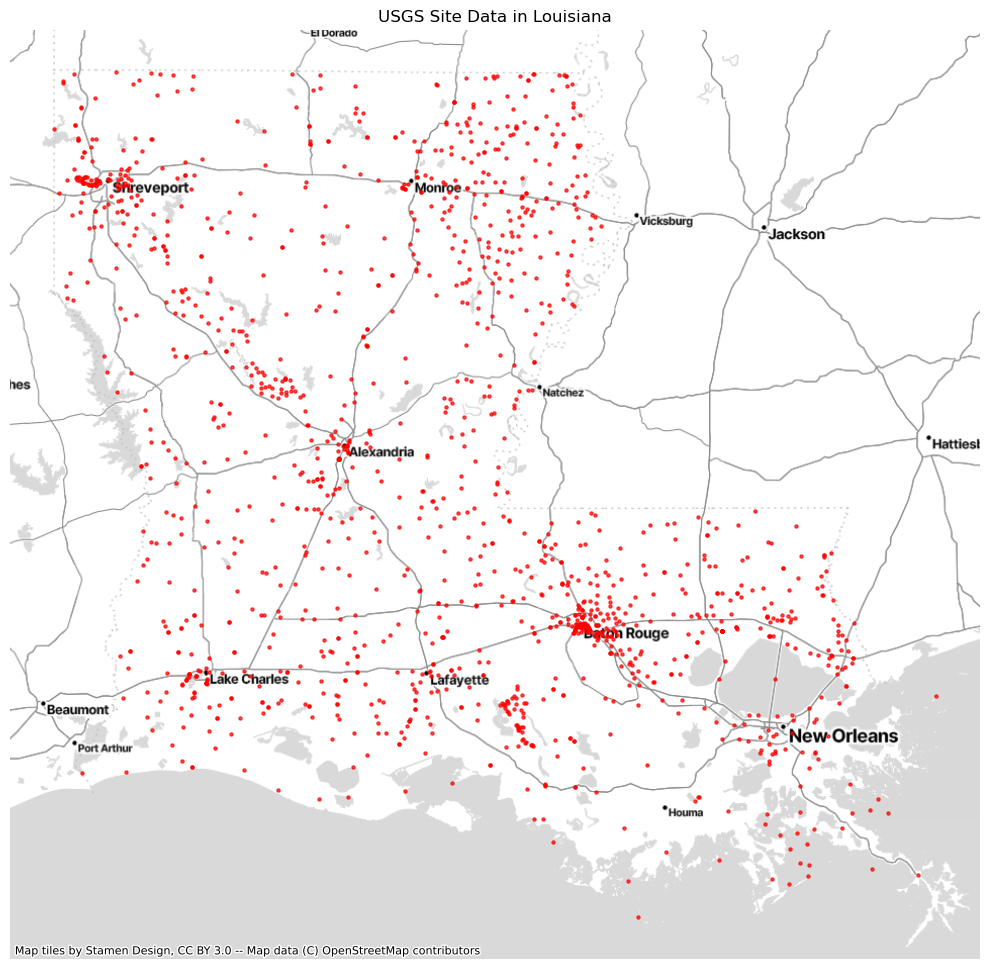

In [110]:
visualize_usgs_site_data_on_map(gdf_nad27)

## Save the GeoDataFrame to a Shapefile

Saves the reprojected USGS gage data for Louisiana to a shapefile.

The script defines the output path for the shapefile and then saves the GeoDataFrame, which is in the NAD27 (EPSG:4267) CRS, to that path.

Attributes:
    output_path (str): The path where the shapefile will be saved.
    gdf_nad27 (GeoDataFrame): The GeoDataFrame containing reprojected USGS gage data for Louisiana.

In [111]:
output_path = "usgs_gages_louisiana_nad27.shp"
gdf_nad27.to_file(output_path)


C:\Users\asaharia\AppData\Local\Temp\ipykernel_20476\1963328226.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nad27.to_file(output_path)


## Export GeoDataFrame to a CSV File

Exports the reprojected USGS gage data for Louisiana to a CSV file, excluding the geometry column.

The script defines the output path for the CSV file and then saves the GeoDataFrame, after dropping its geometry column, to that path.

Attributes:
    csv_output_path (str): The path where the CSV file will be saved.
    gdf_nad27 (GeoDataFrame): The GeoDataFrame containing reprojected USGS gage data for Louisiana.

In [112]:
#  save the data to a CSV file
csv_output_path = "usgs_gages_louisiana.csv"
gdf_nad27.drop(columns='geometry').to_csv(csv_output_path, index=False)

## Read and Reproject HUC8 Shapefile, and Clip Gages to HUC8 Boundary

In [113]:
# Define the path to your HUC8 shapefile
huc8_path = "Z:\\LWI2023-24\\HUC8s_roughcut.shp"  # Replace with the actual path to your HUC8 shapefile

# Call the function and store the results
huc8_gdf_reprojected, clipped_gages = clip_gages_to_huc8_boundary(huc8_path, gdf_nad27)


In [114]:
%matplotlib inline

## Clipped USGS Site Data Visualization with HUC8 Boundary Background

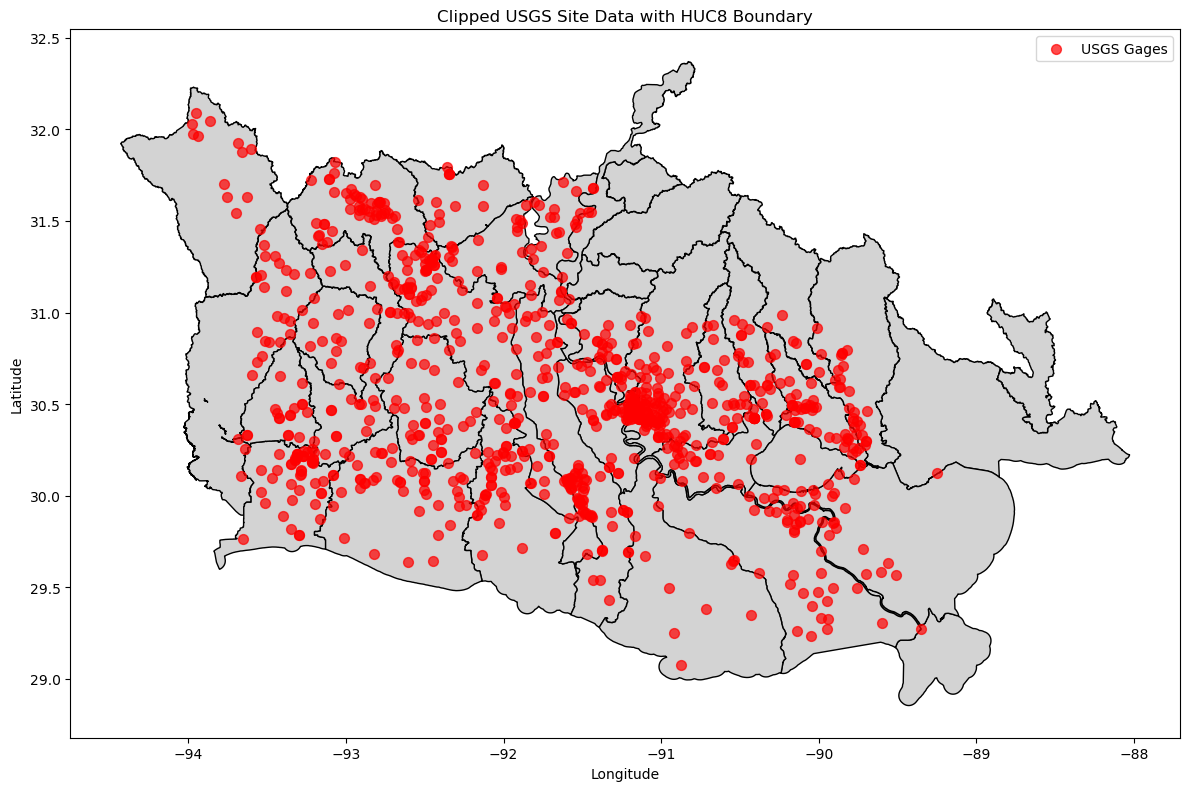

In [115]:
visualize_clipped_usgs_gages_with_huc8_boundary(huc8_gdf_reprojected, clipped_gages)

## Save Clipped USGS Gages to a Shapefile

Saves the clipped USGS gages data for Louisiana to a shapefile.

The script defines the output path for the shapefile and then saves the clipped GeoDataFrame, which contains USGS gages data clipped to the HUC8 boundary, to that path.

In [116]:
clipped_output_path = "clipped_usgs_gages_louisiana.shp"
clipped_gages.to_file(clipped_output_path)

C:\Users\asaharia\AppData\Local\Temp\ipykernel_20476\1831645215.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clipped_gages.to_file(clipped_output_path)


## Export Clipped USGS Gages Data to a CSV File

Exports the clipped USGS gages data for Louisiana to a CSV file, excluding the geometry column.

The script defines the output path for the CSV file and then saves the clipped GeoDataFrame, after dropping its geometry column, to that path.

In [117]:
# Drop the geometry column and save the Clipped gage data to a CSV file
clipped_csv_output_path = "clipped_usgs_gages_louisiana.csv"
clipped_gages.drop(columns='geometry').to_csv(clipped_csv_output_path, index=False)


## Fetch and Process Stage and Discharge Data for Clipped USGS Gages

In [118]:
START_DATE = "2014-11-05"
END_DATE = "2022-12-11"

df_usgs_stage, df_usgs_discharge = fetch_and_process_usgs_data(START_DATE, END_DATE, clipped_gages)

## Examine and Display Stage and Discharge Data Summary

In [119]:
examine_usgs_data(df_usgs_stage, df_usgs_discharge)

Stage Data:
                           07380249, USGS  07380245, USGS  073802516, USGS  \
datetime                                                                     
2014-11-05 00:00:00-06:00             NaN             NaN         7.332813   
2014-11-06 00:00:00-06:00             NaN             NaN         7.207187   
2014-11-07 00:00:00-06:00             NaN             NaN         7.186458   
2014-11-08 00:00:00-06:00             NaN             NaN         7.230625   
2014-11-09 00:00:00-06:00             NaN             NaN         7.209167   

                           07380260, USGS  291929089562600, USGS  \
datetime                                                           
2014-11-05 00:00:00-06:00             NaN               3.184167   
2014-11-06 00:00:00-06:00             NaN               3.016250   
2014-11-07 00:00:00-06:00             NaN               2.905000   
2014-11-08 00:00:00-06:00             NaN               2.999167   
2014-11-09 00:00:00-06:00        

## Export Stage and Discharge Statistics to CSV

Exports the statistical summaries of stage and discharge data to separate CSV files.

The script carries out the following steps:
1. Checks if the `df_usgs_stage` DataFrame is empty. If not, calculates its statistical summary and exports it to `stage_data_statistics.csv`.
2. Checks if the `df_usgs_discharge` DataFrame is empty. If not, calculates its statistical summary and exports it to `discharge_data_statistics.csv`.

Attributes:
    df_usgs_stage (DataFrame): DataFrame containing consolidated stage data for USGS gages.
    df_usgs_discharge (DataFrame): DataFrame containing consolidated discharge data for USGS gages.
    stage_statistics (DataFrame): Statistical summary of `df_usgs_stage`.
    discharge_statistics (DataFrame): Statistical summary of `df_usgs_discharge`.

In [120]:
# Export stage statistics to CSV if data is available
if not df_usgs_stage.empty:
    stage_statistics = df_usgs_stage.describe()
    stage_statistics.to_csv("stage_data_statistics.csv")

# Export discharge statistics to CSV if data is available
if not df_usgs_discharge.empty:
    discharge_statistics = df_usgs_discharge.describe()
    discharge_statistics.to_csv("discharge_data_statistics.csv")

## Export Stage and Discharge Data to CSV Files

Exports the stage and discharge data for USGS gages to separate CSV files.

The script carries out the following steps:
1. Saves the `df_usgs_stage` DataFrame to a CSV file named "stage_data.csv".
2. Saves the `df_usgs_discharge` DataFrame to a CSV file named "discharge_data.csv".

Attributes:
    df_usgs_stage (DataFrame): DataFrame containing consolidated stage data for USGS gages.
    df_usgs_discharge (DataFrame): DataFrame containing consolidated discharge data for USGS gages.

In [121]:
# Save the DataFrames to CSV files
df_usgs_stage.to_csv("stage_data.csv")
df_usgs_discharge.to_csv("discharge_data.csv")

## Display Column Names of the Stage Data DataFrame

Displays the column names of the `df_usgs_stage` DataFrame, which contains consolidated stage data for USGS gages.

The script prints the column names of the `df_usgs_stage` DataFrame to provide a quick overview of the available data columns.

Attributes:
    df_usgs_stage (DataFrame): DataFrame containing consolidated stage data for USGS gages.

In [122]:
print(df_usgs_stage.columns)

Index(['07380249, USGS', '07380245, USGS', '073802516, USGS', '07380260, USGS',
       '291929089562600, USGS', '073802514, USGS', '073802512, USGS',
       '07380251, USGS', '292800090060000, USGS', '073813498, USGS',
       ...
       '08028000, USGS', '07353990, USGS', '08025500, USGS', '08023400, USGS',
       '08023080, USGS', '07373000, USGS', '07372750, USGS', '07373250, USGS',
       '07372200, USGS', '07353520, USGS'],
      dtype='object', length=205)


## Visualize Stage Data Over Time for a Specific USGS Gage

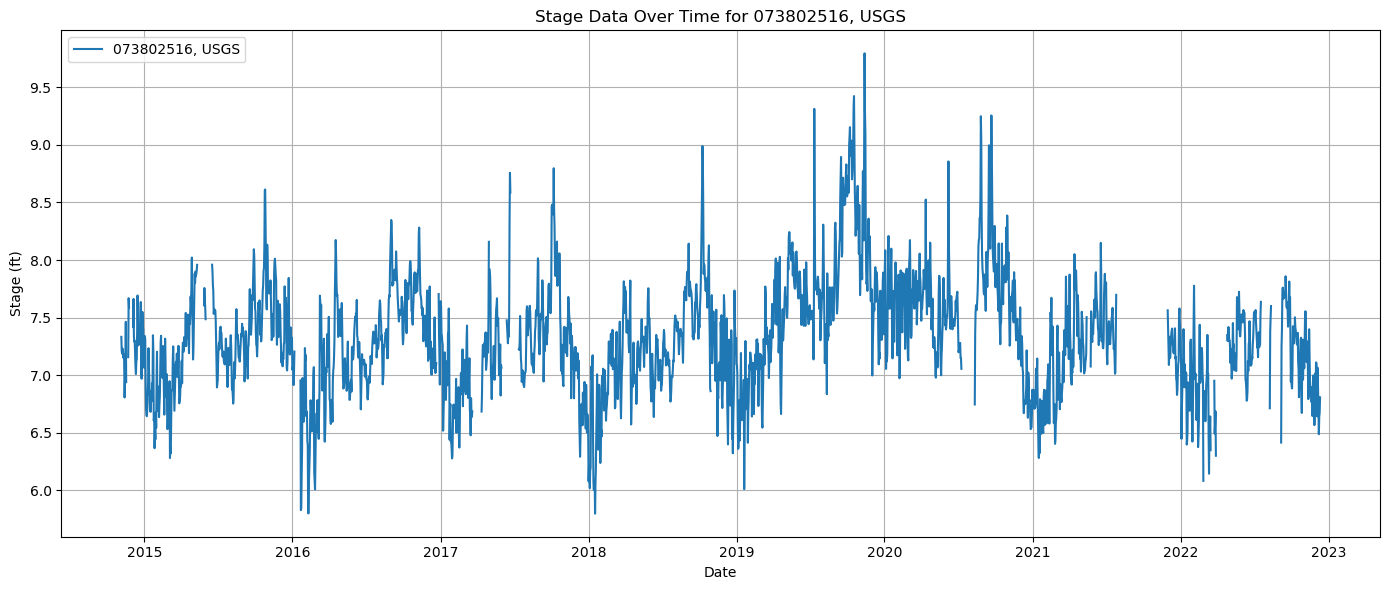

In [123]:
site_number = "073802516"
plot_stage_data_for_site(df_usgs_stage, site_number)

## Display Column Names of the Discharge Data DataFrame

Displays the column names of the `df_usgs_discharge` DataFrame, which contains consolidated discharge data for USGS gages.

In [124]:
print(df_usgs_discharge.columns)

Index(['07381324, USGS', '07381235, USGS', '07381000, USGS', '07380238, USGS',
       '295124089542100, USGS', '07374525, USGS', '295501090190400, USGS',
       '073814675, USGS', '07380401, USGS', '07381600, USGS', '07381590, USGS',
       '07381454, USGS', '07381670, USGS', '07385765, USGS', '07385700, USGS',
       '07381588, USGS', '07381427, USGS', '07381429, USGS', '073802280, USGS',
       '07380210, USGS', '07380120, USGS', '07376300, USGS', '07378500, USGS',
       '07376000, USGS', '07376500, USGS', '07375500, USGS', '07378000, USGS',
       '07377300, USGS', '07375450, USGS', '02492000, USGS', '07374000, USGS',
       '07381490, USGS', '07381482, USGS', '073556009, USGS', '07375000, USGS',
       '07375960, USGS', '02491800, USGS', '02489500, USGS', '07377600, USGS',
       '07377500, USGS', '07377000, USGS', '07375800, USGS', '07375300, USGS',
       '07386980, USGS', '07386956, USGS', '07386880, USGS', '08012150, USGS',
       '07386700, USGS', '08010050, USGS', '08010120,

## Visualize Discharge Data Over Time for a Specific USGS Gage

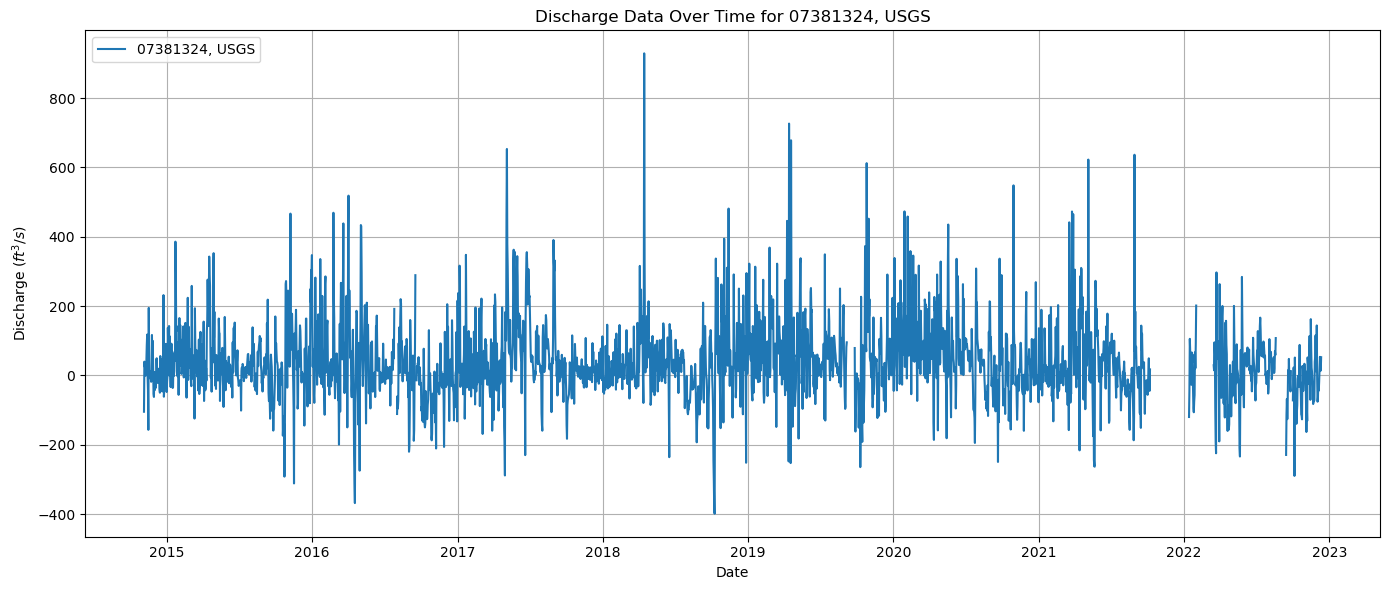

In [125]:
site_number = "07381324"
plot_discharge_data_for_site(df_usgs_discharge, site_number)

## Visualize Stage Data Over Time for All USGS Gages

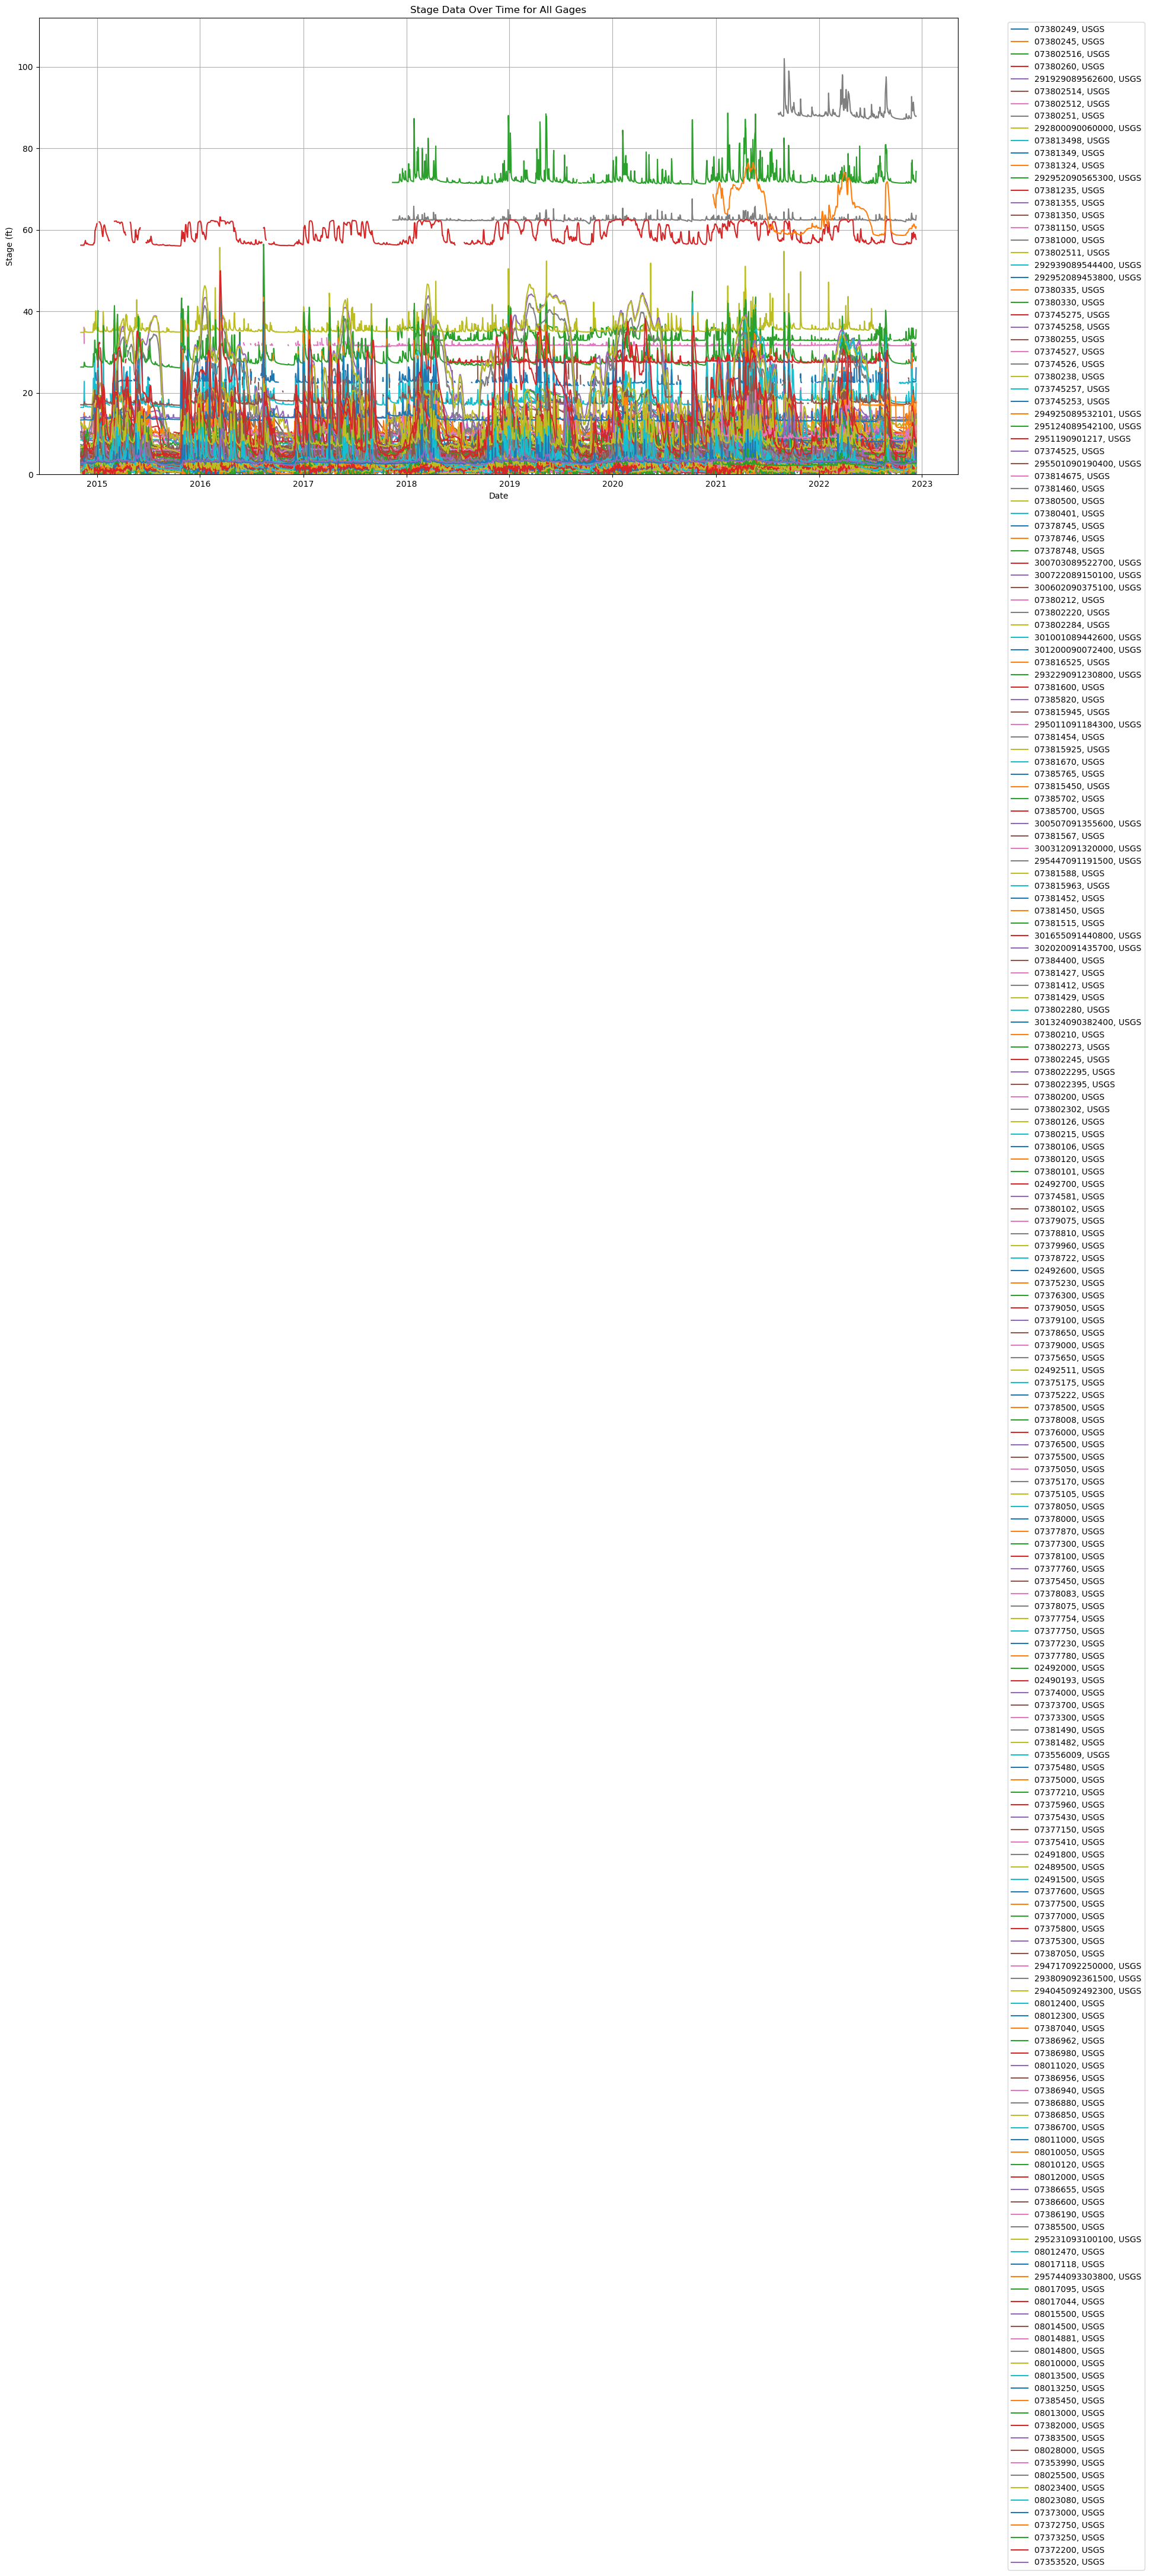

In [126]:
plot_all_stage_data(df_usgs_stage)

## Visualize Discharge Data Over Time for All USGS Gages

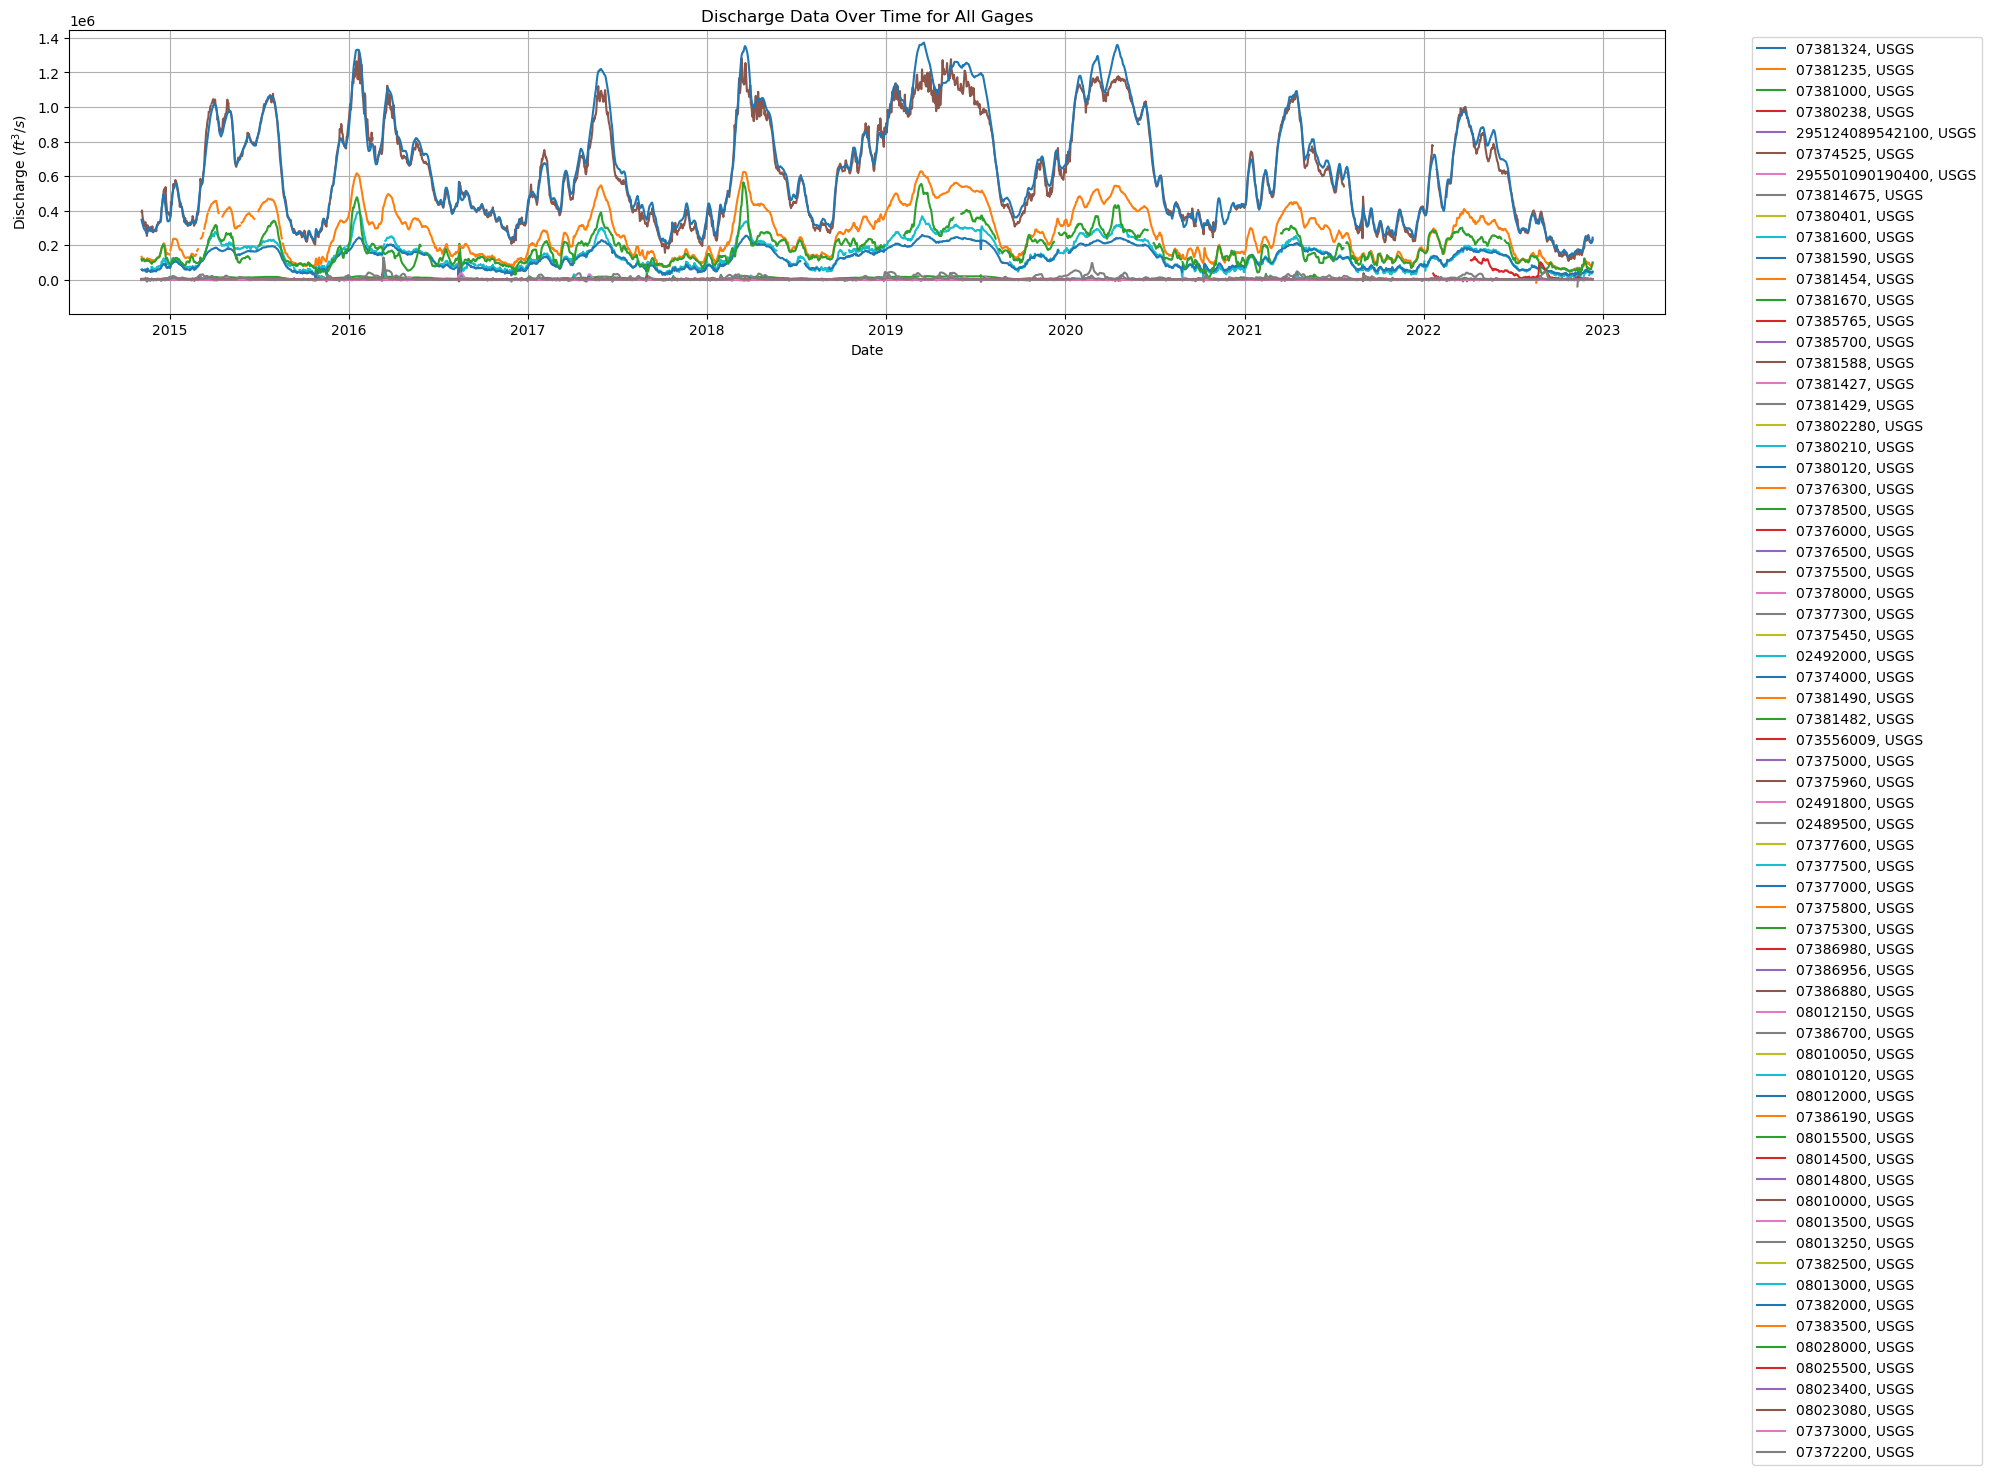

In [127]:
plot_all_discharge_data(df_usgs_discharge)